# TABLE OF CONTENTS:

### - PART 1: CHECK IMBALANCE
### - PART 2: CHECK OUTLIER
### - PART 3: CHECK MISSING VALUES
### - PART 4: CHECK CATEGORICAL COLUMNS 
### - PART 5: EDA
### - PART 6: OBSERVATION AND CONCLUSION

In [1]:
from utils import *
from input import path_to_data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#for 100% jupyter notebook cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pandas DataFrame column and row display limits
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline

**dseb63_application_{train|test}.csv**

In [3]:
application_train = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_train.csv'), index_col=0)

In [4]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,

In [5]:
print('-'*90)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*90)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 122)
------------------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
------------------------------------------------------------------------------------------


In [6]:
application_test = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_test.csv'), index_col=0)

In [7]:
application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,0.4167,...,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,...,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,Secondary / seco

In [8]:
print('-'*100)
print(f'The shape of dseb63_application_test.csv is: {application_test.shape}')
print('-'*100)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)

----------------------------------------------------------------------------------------------------
The shape of dseb63_application_test.csv is: (61502, 121)
----------------------------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
----------------------------------------------------------------------------------------------------


# *0. LOOKTHROUGH DATA*

**dseb63_credit_card_balance.csv**

In [9]:
credit_card_balance = pd.read_csv(os.path.join(path_to_data, 'dseb63_credit_card_balance.csv'), on_bad_lines='skip')
credit_card_balance.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,9000.0,15488.685,16809.210,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,4500.0,26125.020,27577.890,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,2250.0,60301.170,65609.235,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,4500.0,63975.015,70475.850,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


In [10]:
column_to_move = 'SK_ID_CURR'  

# Get a list of column names excluding the column to move
other_columns = [col for col in credit_card_balance .columns if col != column_to_move]

# Reorder the columns with the column to move in the second position
credit_card_balance = credit_card_balance[other_columns[:1] + [column_to_move] + other_columns[1:]]

credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2582071,87788,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1,2582071,87788,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,9000.0,15488.685,16809.210,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0
2,2582071,87788,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,4500.0,26125.020,27577.890,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0
3,2582071,87788,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,2250.0,60301.170,65609.235,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0
4,2582071,87788,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,4500.0,63975.015,70475.850,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0


In [11]:
credit_card_balance.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227965 entries, 0 to 3227964
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [12]:
credit_card_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3227965.0,1.903894e+06,536741.485168,1000018.000,1431613.0,1896076.00,2369259.000,2843493.000
SK_ID_CURR,3227965.0,1.536542e+05,88571.206001,0.000,76905.0,153207.00,230048.000,307509.000
MONTHS_BALANCE,3227965.0,-3.471544e+01,26.636089,-96.000,-56.0,-28.00,-11.000,-1.000
AMT_BALANCE,3227965.0,5.907332e+04,106613.654377,-420250.185,0.0,0.00,90405.540,1354829.265
AMT_CREDIT_LIMIT_ACTUAL,3227965.0,1.529536e+05,163709.196232,0.000,45000.0,112500.00,180000.000,1350000.000
AMT_DRAWINGS_ATM_CURRENT,2622211.0,6.024272e+03,28421.163969,-6827.310,0.0,0.00,0.000,2115000.000
AMT_DRAWINGS_CURRENT,3227965.0,7.494084e+03,33967.429845,-6211.620,0.0,0.00,0.000,2115000.000
AMT_DRAWINGS_OTHER_CURRENT,2622211.0,2.984882e+02,8396.192507,0.000,0.0,0.00,0.000,1529847.000
AMT_DRAWINGS_POS_CURRENT,2622211.0,2.884152e+03,20388.326800,0.000,0.0,0.00,0.000,2060030.160
AMT_INST_MIN_REGULARITY,2963581.0,3.599681e+03,5611.741784,0.000,0.0,0.00,6750.000,202882.005


In [13]:
print(f'The shape of dseb63_credit_card_balance.csv is: {credit_card_balance.shape}')
print('-'*90)
print(f'Number of unique SK_ID_PREV in dseb63_credit_card_balance.csv are: {len(credit_card_balance.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dseb63_credit_card_balance.csv are: {len(credit_card_balance.SK_ID_CURR.unique())}')
print('-'*90)
print(f'Number of overlapping SK_ID_CURR in dseb63_application_train.csv and credit_card_balance.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(credit_card_balance.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in dseb63_application_test.csv and credit_card_balance.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(credit_card_balance.SK_ID_CURR.unique())))}')
print('-'*90)

print(f'Number of duplicate values in credit_card_balance: {credit_card_balance.shape[0] - credit_card_balance.duplicated().shape[0]}')

The shape of dseb63_credit_card_balance.csv is: (3227965, 23)
------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in dseb63_credit_card_balance.csv are: 87452
Number of unique SK_ID_CURR in dseb63_credit_card_balance.csv are: 86905
------------------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in dseb63_application_train.csv and credit_card_balance.csv are: 69536
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and credit_card_balance.csv are: 17369
------------------------------------------------------------------------------------------
Number of duplicate values in credit_card_balance: 0


# *1.IMBALANCE*

In [14]:
imbalance_col(credit_card_balance)

Imbalance Ratio for column 'MONTHS_BALANCE': None
Imbalance Ratio for column 'AMT_BALANCE': None
Imbalance Ratio for column 'AMT_CREDIT_LIMIT_ACTUAL': None
Imbalance Ratio for column 'AMT_DRAWINGS_ATM_CURRENT': None
Imbalance Ratio for column 'AMT_DRAWINGS_CURRENT': None
Imbalance Ratio for column 'AMT_DRAWINGS_OTHER_CURRENT': None
Imbalance Ratio for column 'AMT_DRAWINGS_POS_CURRENT': None
Imbalance Ratio for column 'AMT_INST_MIN_REGULARITY': None
Imbalance Ratio for column 'AMT_PAYMENT_CURRENT': None
Imbalance Ratio for column 'AMT_PAYMENT_TOTAL_CURRENT': None
Imbalance Ratio for column 'AMT_RECEIVABLE_PRINCIPAL': None
Imbalance Ratio for column 'AMT_RECIVABLE': None
Imbalance Ratio for column 'AMT_TOTAL_RECEIVABLE': None
Imbalance Ratio for column 'CNT_DRAWINGS_ATM_CURRENT': 0.0809
Imbalance Ratio for column 'CNT_DRAWINGS_CURRENT': 0.0728
Imbalance Ratio for column 'CNT_DRAWINGS_OTHER_CURRENT': 0.0038
Imbalance Ratio for column 'CNT_DRAWINGS_POS_CURRENT': 0.0249
Imbalance Ratio for 

##### Observatiosn and Conclusions

Several columns, such as 'CNT_DRAWINGS_ATM_CURRENT,' 'CNT_DRAWINGS_CURRENT,' and 'CNT_INSTALMENT_MATURE_CUM,' exhibit moderate imbalances, suggesting variations in the frequency of certain activities or behaviors.

Columns like 'CNT_DRAWINGS_POS_CURRENT' and 'NAME_CONTRACT_STATUS' have an imbalance ratio of 0, suggesting a more even distribution in their respective categories.

# *2. Outlier*

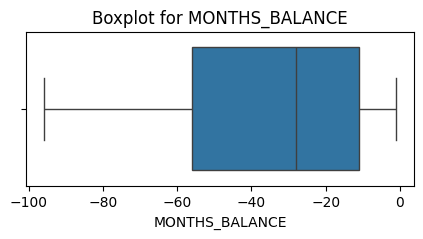

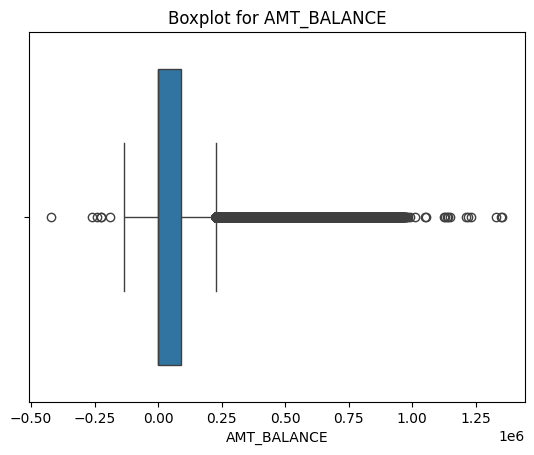

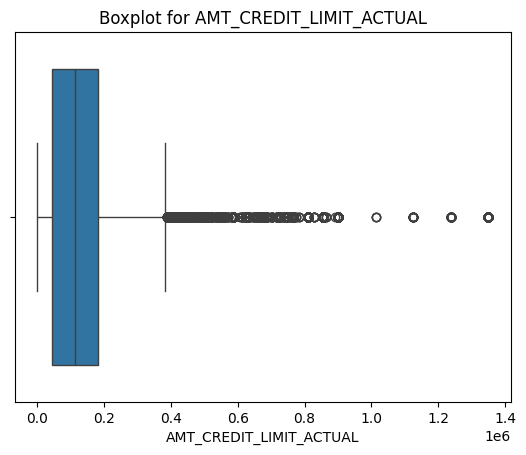

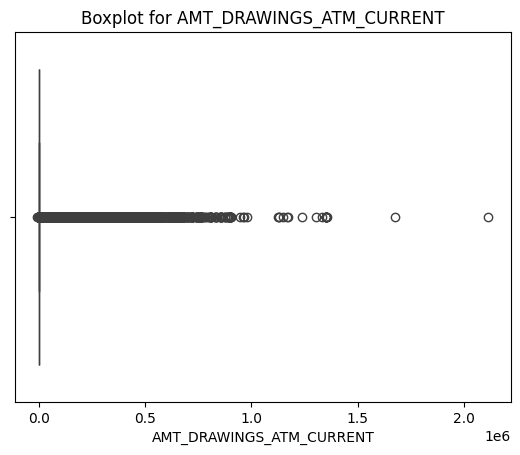

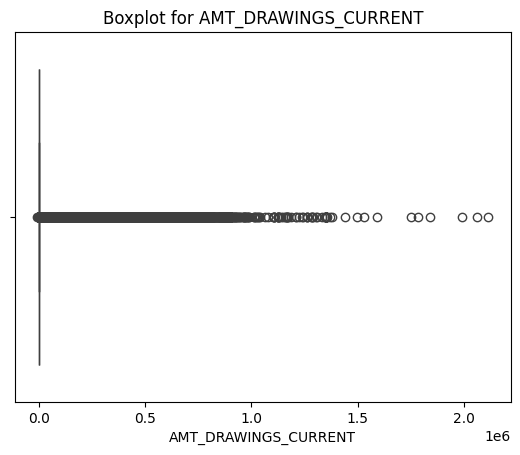

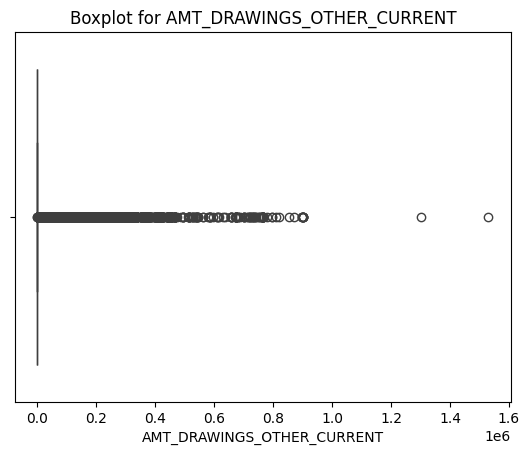

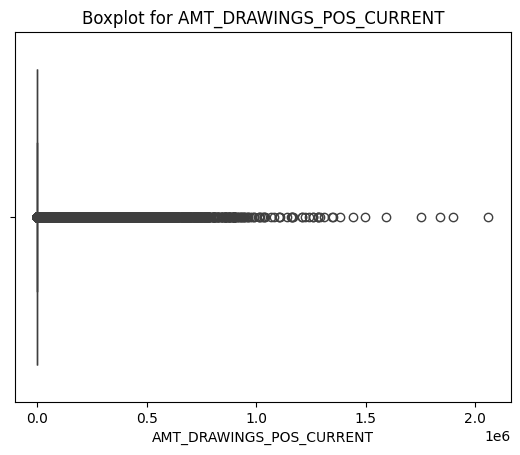

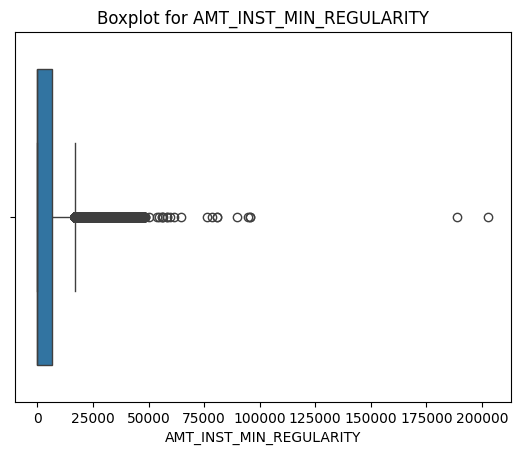

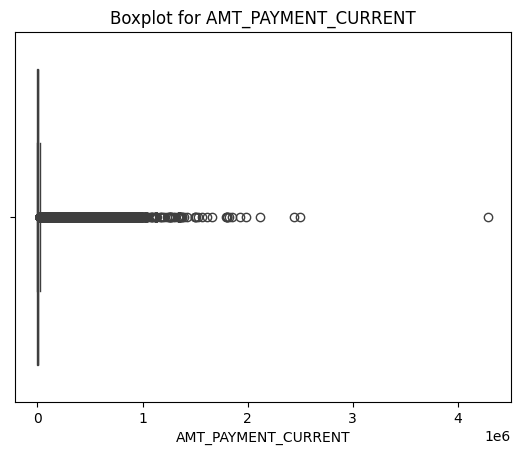

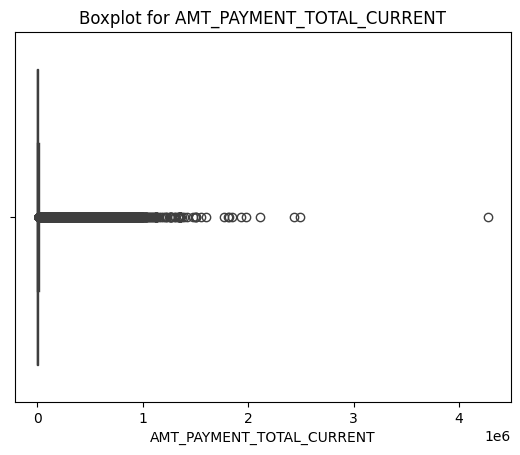

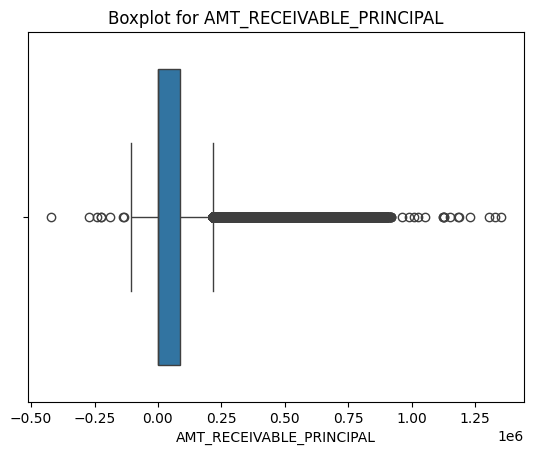

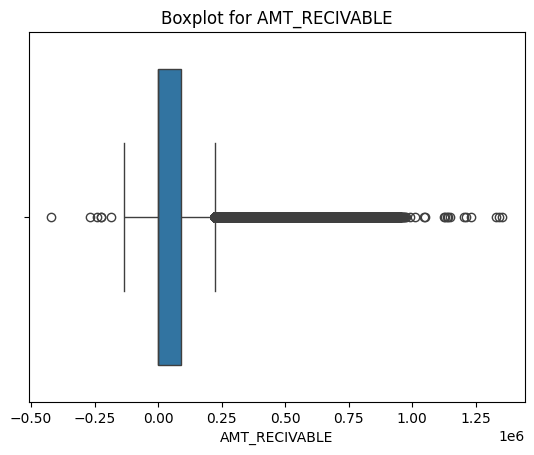

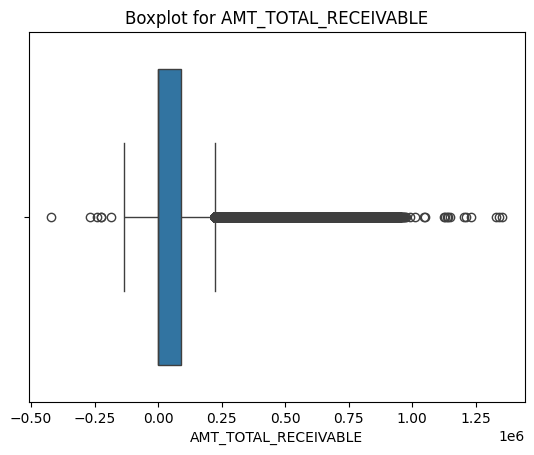

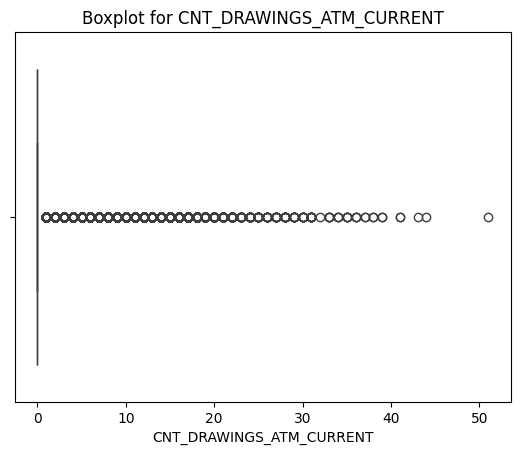

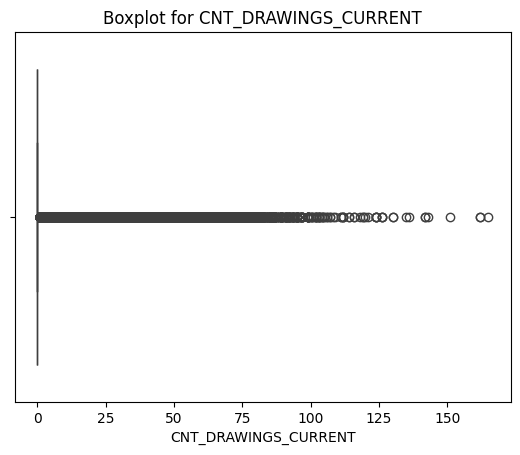

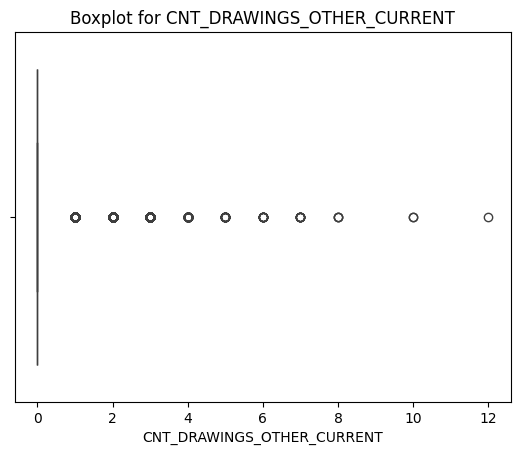

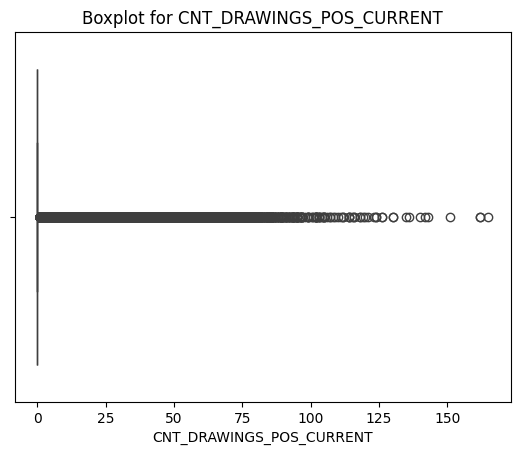

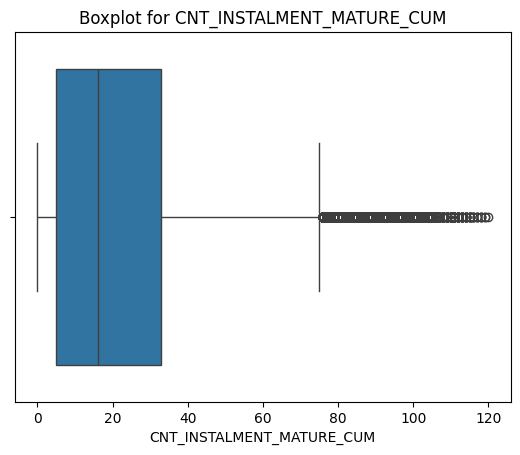

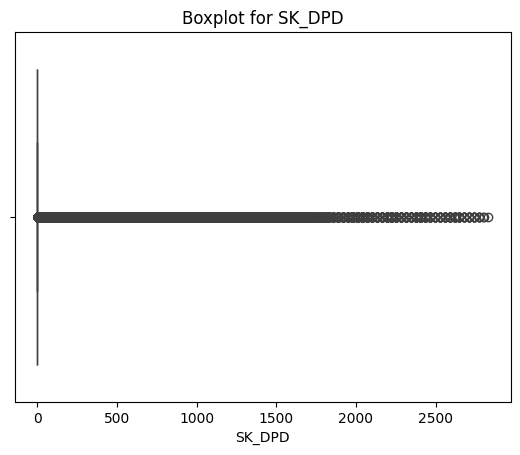

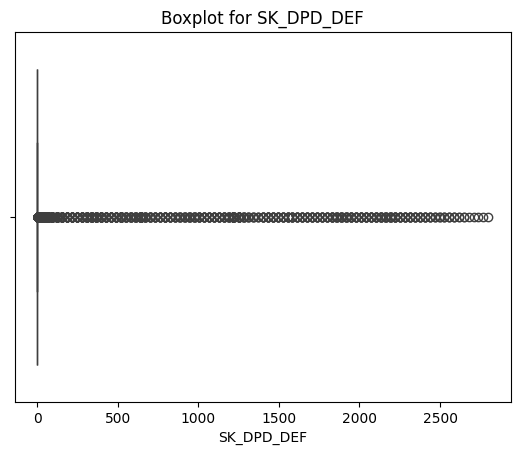

Rows with outliers:
         MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0                    -1    63975.555                    45000   
4                   -59    70475.850                    67500   
8                   -58    66873.915                    67500   
18                  -10    41272.740                    45000   
20                  -92    59557.770                    67500   
...                 ...          ...                      ...   
3227946              -2   146628.000                   247500   
3227947              -2   228528.675                   450000   
3227948              -2    92677.185                    90000   
3227954              -1   135000.000                        0   
3227956              -1   163102.500                   180000   

         AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                          2250.0              2250.000   
4                         24750.0             24750.000   
8                     

In [15]:
outlier(credit_card_balance)

# *3. NaN Percentage*

In [16]:
nan_cc = nan_percent(credit_card_balance)
nan_cc

,Column,Percentage_of_NaN
10,AMT_PAYMENT_CURRENT,19.210029
18,CNT_DRAWINGS_POS_CURRENT,18.765817
5,AMT_DRAWINGS_ATM_CURRENT,18.765817
15,CNT_DRAWINGS_ATM_CURRENT,18.765817
8,AMT_DRAWINGS_POS_CURRENT,18.765817
7,AMT_DRAWINGS_OTHER_CURRENT,18.765817
17,CNT_DRAWINGS_OTHER_CURRENT,18.765817
19,CNT_INSTALMENT_MATURE_CUM,8.190423
9,AMT_INST_MIN_REGULARITY,8.190423
6,AMT_DRAWINGS_CURRENT,0.000000


Number of columns having NaN values: 9 columns


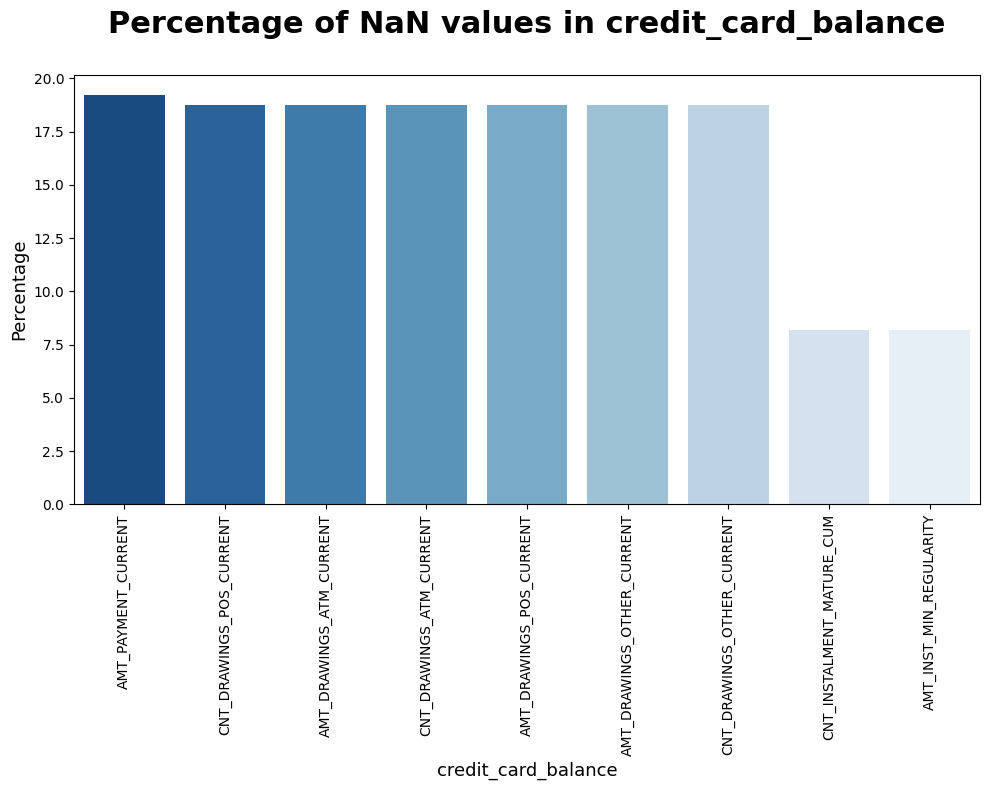

In [17]:
plot_nan_percent(nan_cc, 'credit_card_balance', tight_layout = False, figsize = (10,8))

##### Observatiosn and Conclusions

<ol><li>Out of the 23 features, 11 of these features contain some NaN values.</li>
    <li>If we look at the percentages of NaN values, they are considerably lower than the rest of the tables we have seen so far.</li>
    <li>7 of these features have close to 20% NaN values. These features are mostly related to the Amounts of Drawing and Counts of Drawings. Other two of the features are related to the installments statistics.</li></ol>

# *4.  CATEGORICAL COLUMN*

In [18]:
cate_cc = get_category_column(credit_card_balance)
cate_cc

,Feature,Nunique,Percentage of NaN
0,NAME_CONTRACT_STATUS,7,0.0


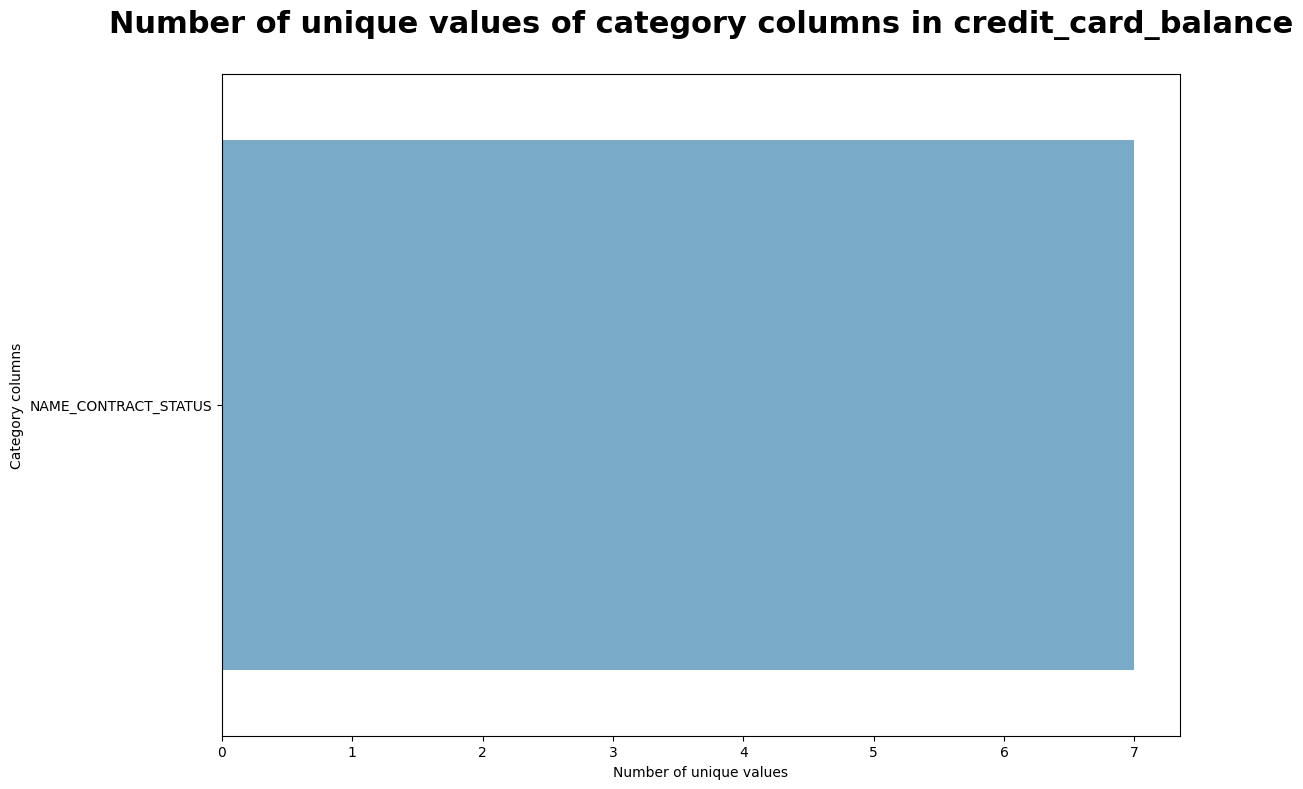

In [19]:
plot_category_column(cate_cc, 'credit_card_balance')

##### Observatiosn and Conclusions

The feature "CNT_DRAWINGS_POS_CURRENT" has 19.00% of its values missing (NaN). This relatively high percentage of missing values might impact the analysis or modeling process. Consider exploring the distribution of non-missing values and determining whether imputation or other strategies are appropriate.
NAME_CONTRACT_STATUS:

The feature "NAME_CONTRACT_STATUS" has 8 unique values, indicating that it represents categorical data with 8 different contract statuses. It's notable that there are no missing values (0.0% NaN), which is beneficial for analysis or modeling tasks.

# *5.EDA*

### - Merging the TARGETS from application_train to credit_card_balance table

In [20]:
print("-"*90)
print("Merging TARGET with credit_card_balance Table")
credit_card_balance_merged = application_train[['TARGET','SK_ID_CURR']].merge(credit_card_balance, on = 'SK_ID_CURR', how = 'left')
print("-"*90)

------------------------------------------------------------------------------------------
Merging TARGET with credit_card_balance Table
------------------------------------------------------------------------------------------


### - Correlation Matrix of Features

------------------------------------------------------------------------------------------


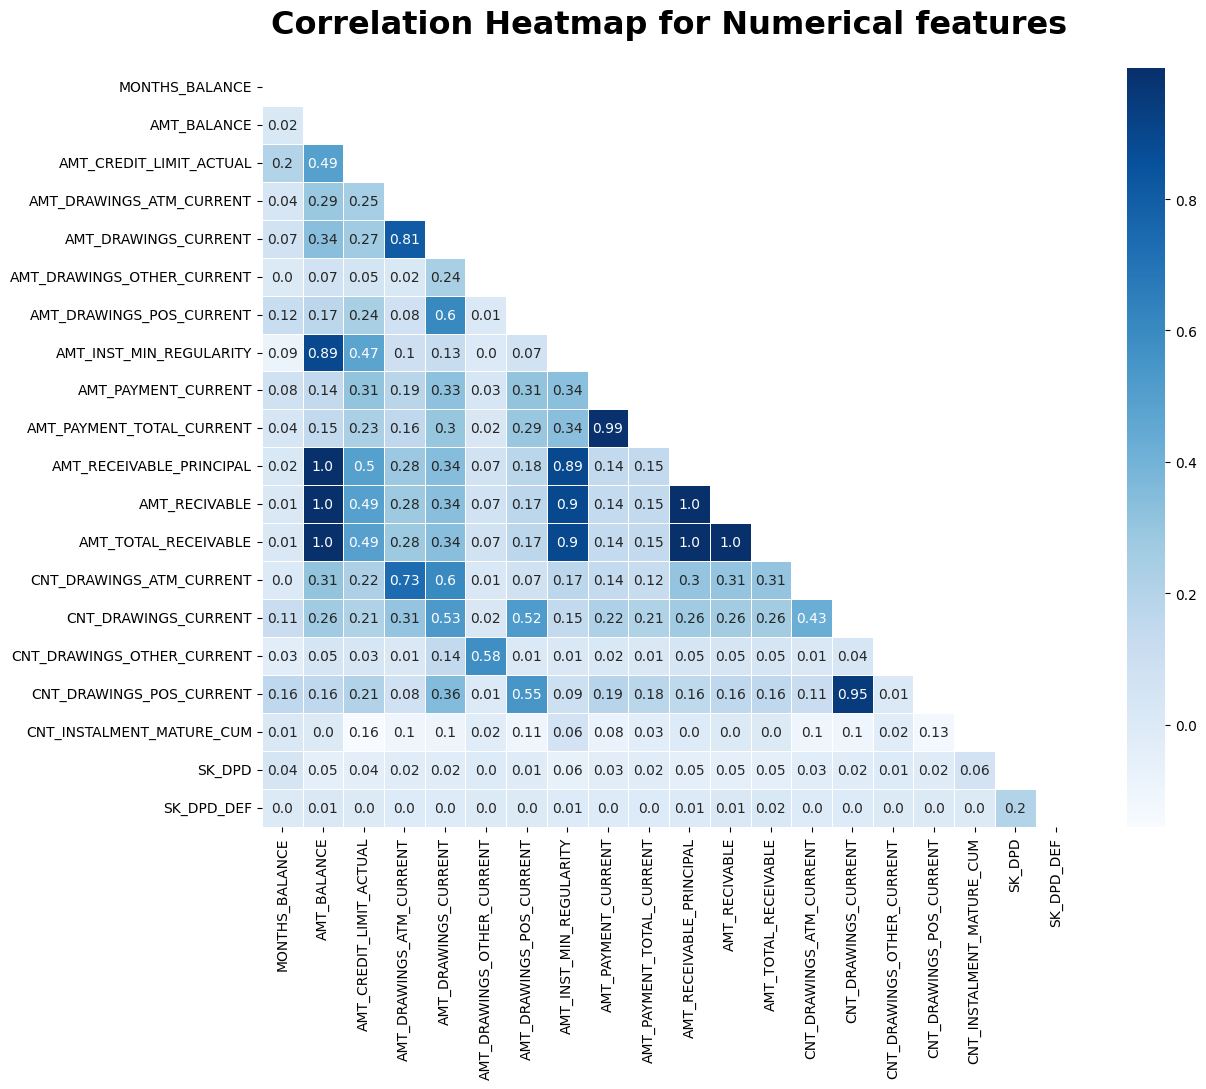

------------------------------------------------------------------------------------------


In [21]:
corr_mat = correlation_matrix(credit_card_balance_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (13,11))
corr_mat.plot_correlation_matrix()

In [22]:
#Seeing the top columns with highest phik-correlation with the target variable in credit_card_balance table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-" * 100)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']


interval columns not set, guessing: ['TARGET', 'AMT_BALANCE']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_LIMIT_ACTUAL']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_ATM_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_OTHER_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_POS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_INST_MIN_REGULARITY']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_TOTAL_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_RECEIVABLE_PRINCIPAL']
interval columns not set, guessing: ['TARGET', 'AMT_RECIVABLE']
interval columns not set, guessing: ['TARGET', 'AMT_TOTAL_RECEIVABLE']
interval columns not set, guessing: ['TARGET', 'CNT_DRAWINGS_ATM_CURRENT']
interval columns not set, guessing: ['TARGET', 'CNT_DRAWINGS_

,Column Name,Phik-Correlation
1,AMT_BALANCE,0.063770
12,AMT_TOTAL_RECEIVABLE,0.063668
11,AMT_RECIVABLE,0.063441
10,AMT_RECEIVABLE_PRINCIPAL,0.063250
0,MONTHS_BALANCE,0.048528
7,AMT_INST_MIN_REGULARITY,0.040593
17,CNT_INSTALMENT_MATURE_CUM,0.036118
13,CNT_DRAWINGS_ATM_CURRENT,0.028858
14,CNT_DRAWINGS_CURRENT,0.027671
2,AMT_CREDIT_LIMIT_ACTUAL,0.027012


----------------------------------------------------------------------------------------------------


### - Plotting Continuous Variables

<b><u>+ Distribution of Continuous Vairable AMT_BALANCE</u></b>

This column provided the average amount of balance that a person usually had on his credit card loan account for previous loan.

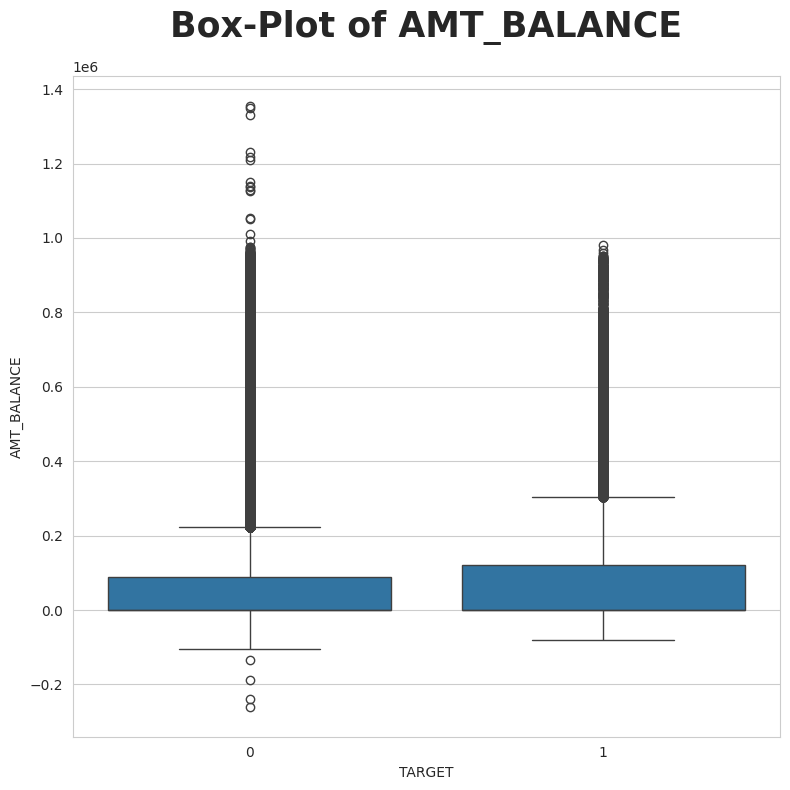

In [23]:
plot_continuous_variables(credit_card_balance_merged, 'AMT_BALANCE', plots = ['box'], figsize = (8,8))

##### Observations and Conclusions

From the above plot, it can be seen that the Defaulters have a higher value of AMT_BALANCE as compared to Non-Defaulters. They show a higher values of all the quantiles and even the whiskers. This could imply that the Credit amount for Defaulters could also be relatively higher as compared to Non-Defaulters.

<b><u>+ Distribution of Continuous Vairable AMT_TOTAL_RECEIVABLE</u></b>

This column describes the average of total amount receivable on the previous credit.

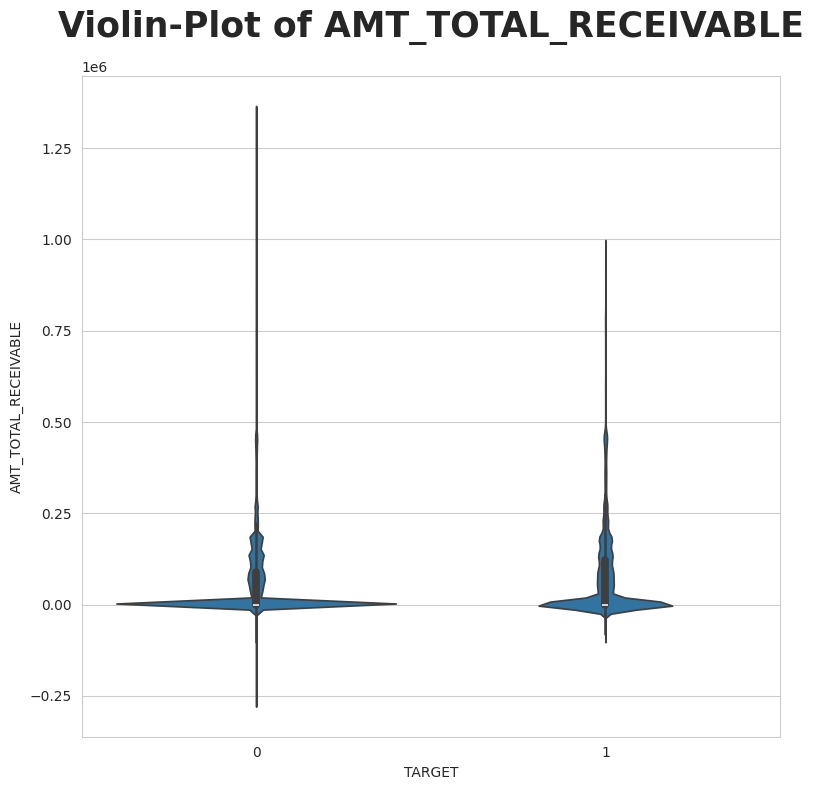

In [24]:
plot_continuous_variables(credit_card_balance_merged, 'AMT_TOTAL_RECEIVABLE', plots = ['violin'], figsize = (8,8))

##### Observations and Conclusions

From the above plot, we see a very interesting behaviour. This plot shows that the Non-Defaulters usually had higher range of values for the number of installments paid as compared to Defaulters. This might show the defaulting behaviour, where in the defaulters usually would pay fewer number of installments on their previous credit.

In [25]:
credit_card_balance.sort_values(by= "SK_ID_CURR")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2890862,1745718,0,-8,4500.00,180000,0.0,4500.00,0.0,4500.00,0.0,NaN,0.00,4500.00,4500.00,4500.00,0.0,1,0.0,1.0,0.0,Active,0,0
2890863,1745718,0,-2,0.00,180000,0.0,23185.89,0.0,23185.89,2250.0,63574.92,63574.92,0.00,0.00,0.00,0.0,3,0.0,3.0,1.0,Active,0,0
2890866,1745718,0,-7,0.00,180000,0.0,2578.50,0.0,2578.50,0.0,7771.50,7771.50,0.00,0.00,0.00,0.0,1,0.0,1.0,0.0,Active,0,0
2890867,1745718,0,-3,36569.43,180000,0.0,56187.00,0.0,56187.00,0.0,16650.00,14400.00,36569.43,36569.43,36569.43,0.0,6,0.0,6.0,0.0,Active,0,0
2890861,1745718,0,-5,0.00,180000,0.0,0.00,0.0,0.00,0.0,488.07,488.07,0.00,0.00,0.00,0.0,0,0.0,0.0,0.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928461,1147091,307509,-48,0.00,0,0.0,0.00,0.0,0.00,0.0,596.43,0.00,0.00,-596.43,-596.43,0.0,0,0.0,0.0,9.0,Active,0,0
928486,1147091,307509,-87,0.00,112500,0.0,0.00,0.0,0.00,0.0,596.43,0.00,0.00,0.00,0.00,0.0,0,0.0,0.0,9.0,Active,0,0
928487,1147091,307509,-85,0.00,112500,0.0,0.00,0.0,0.00,0.0,596.43,0.00,0.00,0.00,0.00,0.0,0,0.0,0.0,9.0,Active,0,0
928488,1147091,307509,-39,0.00,0,0.0,0.00,0.0,0.00,0.0,596.43,0.00,0.00,0.00,0.00,0.0,0,0.0,0.0,9.0,Active,0,0


In [26]:
credit_card_balance["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

NAME_CONTRACT_STATUS
Active           96.552255
Completed         3.098887
Signed            0.307903
Demand            0.026116
Sent proposal     0.014250
Refused           0.000434
Approved          0.000155
Name: proportion, dtype: float64

#### - Get the most recent record of this dataset

In [27]:
ccb = credit_card_balance.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
ccb

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,1745718,-1,12814.605,180000,0.0,25976.250,0.0,25976.250,0.000,10572.345,8322.345,12814.605,12814.605,12814.605,0.0,10,0.0,10.0,1.0,Active,0,0
1,1,1723965,-1,218401.290,225000,0.0,0.000,0.0,0.000,11274.165,11700.000,11700.000,213782.985,218401.290,218401.290,0.0,0,0.0,0.0,8.0,Active,0,0
2,3,2613228,-1,140479.155,135000,0.0,3653.055,0.0,3653.055,7008.615,9078.435,9078.435,134746.965,138771.090,138771.090,0.0,3,0.0,3.0,9.0,Active,0,0
3,7,2765329,-1,0.000,0,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Completed,0,0
4,9,1989688,-1,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,1.0,Completed,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87447,307501,1682952,-3,0.000,247500,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
87448,307504,1025205,-1,0.000,45000,0.0,0.000,0.0,0.000,0.000,118.935,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,40.0,Active,0,0
87449,307505,2764693,-4,0.000,135000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
87450,307508,1320688,-1,0.000,900000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


#### - Feature: Number of loan each customer

In [28]:
ccb["Completed_Flag"] = ccb["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
ccb["Completed_Count"] = ccb.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
ccb.drop(["Completed_Flag"], axis=1, inplace= True)
ccb

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,0,1745718,-1,12814.605,180000,0.0,25976.250,0.0,25976.250,0.000,10572.345,8322.345,12814.605,12814.605,12814.605,0.0,10,0.0,10.0,1.0,Active,0,0,0
1,1,1723965,-1,218401.290,225000,0.0,0.000,0.0,0.000,11274.165,11700.000,11700.000,213782.985,218401.290,218401.290,0.0,0,0.0,0.0,8.0,Active,0,0,0
2,3,2613228,-1,140479.155,135000,0.0,3653.055,0.0,3653.055,7008.615,9078.435,9078.435,134746.965,138771.090,138771.090,0.0,3,0.0,3.0,9.0,Active,0,0,0
3,7,2765329,-1,0.000,0,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Completed,0,0,1
4,9,1989688,-1,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,1.0,Completed,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87447,307501,1682952,-3,0.000,247500,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0
87448,307504,1025205,-1,0.000,45000,0.0,0.000,0.0,0.000,0.000,118.935,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,40.0,Active,0,0,0
87449,307505,2764693,-4,0.000,135000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0
87450,307508,1320688,-1,0.000,900000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0


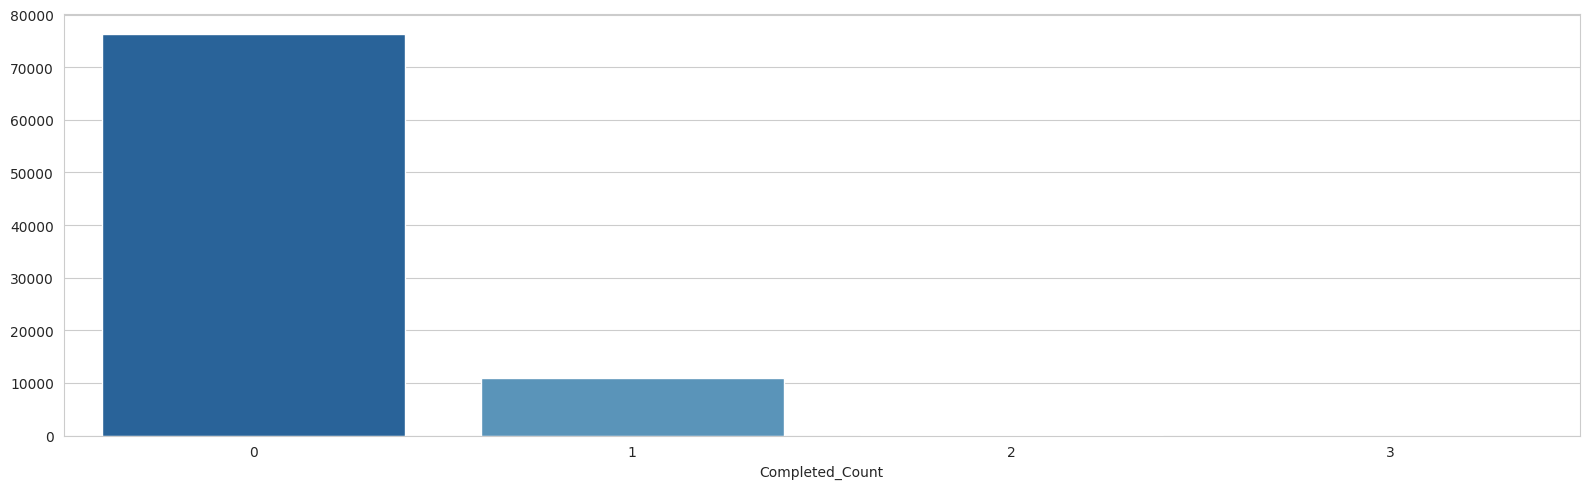

In [29]:
completed_count_SK = ccb.groupby(["Completed_Count"]).size()
plt.figure(figsize=(16,5))
sns.barplot(x = completed_count_SK.index , y = completed_count_SK.values, palette="Blues_r")
plt.tight_layout()
plt.show()

In [30]:
ccb_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], ccb, how= "left", on=["SK_ID_CURR"])
ccb_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,278621,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,139008,0,1489396.0,-1.0,0.0,270000.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0,0.0
2,138348,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,219374,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246465,90253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246466,9027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246467,163598,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246468,300375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


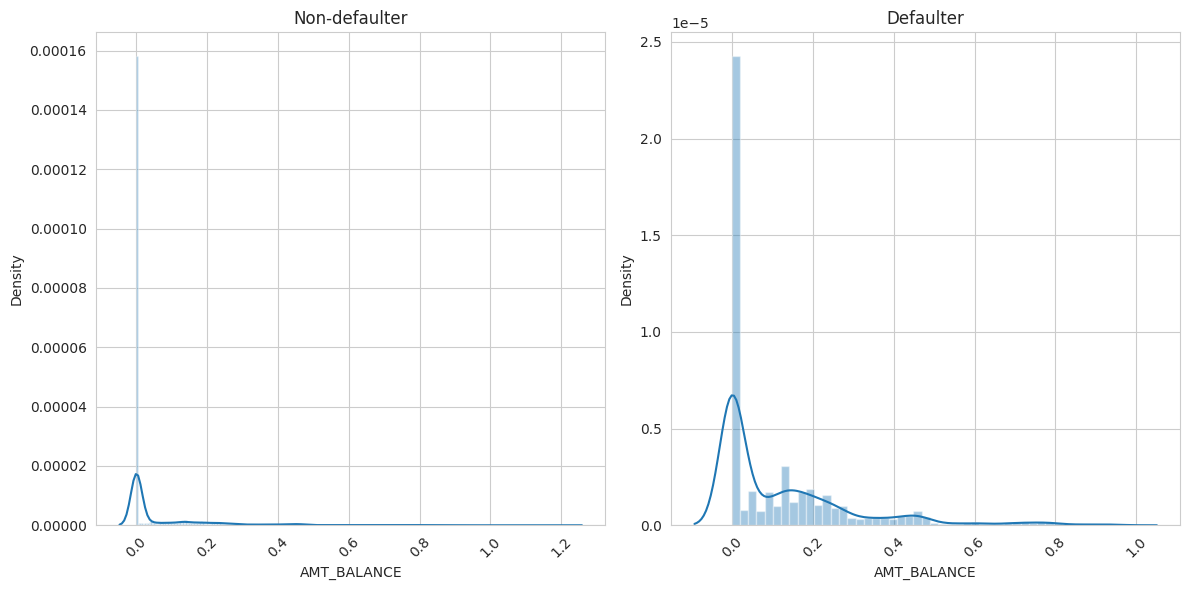

In [31]:
plot_distribution(ccb_merged, 'AMT_BALANCE', 'dist')

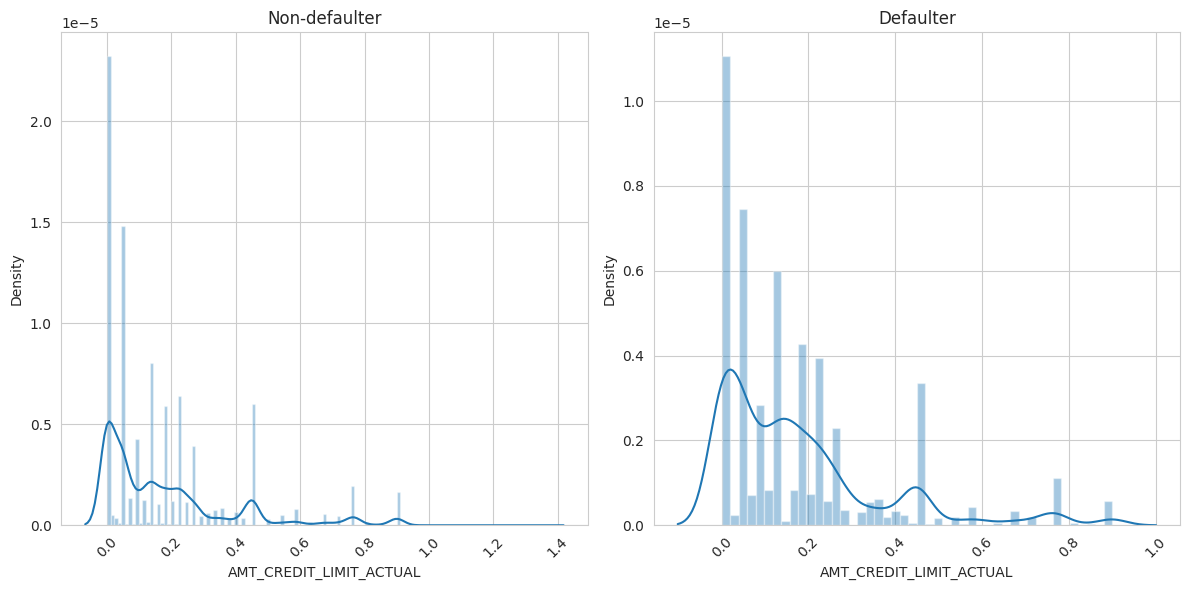

In [32]:
plot_distribution(ccb_merged, 'AMT_CREDIT_LIMIT_ACTUAL', 'dist')

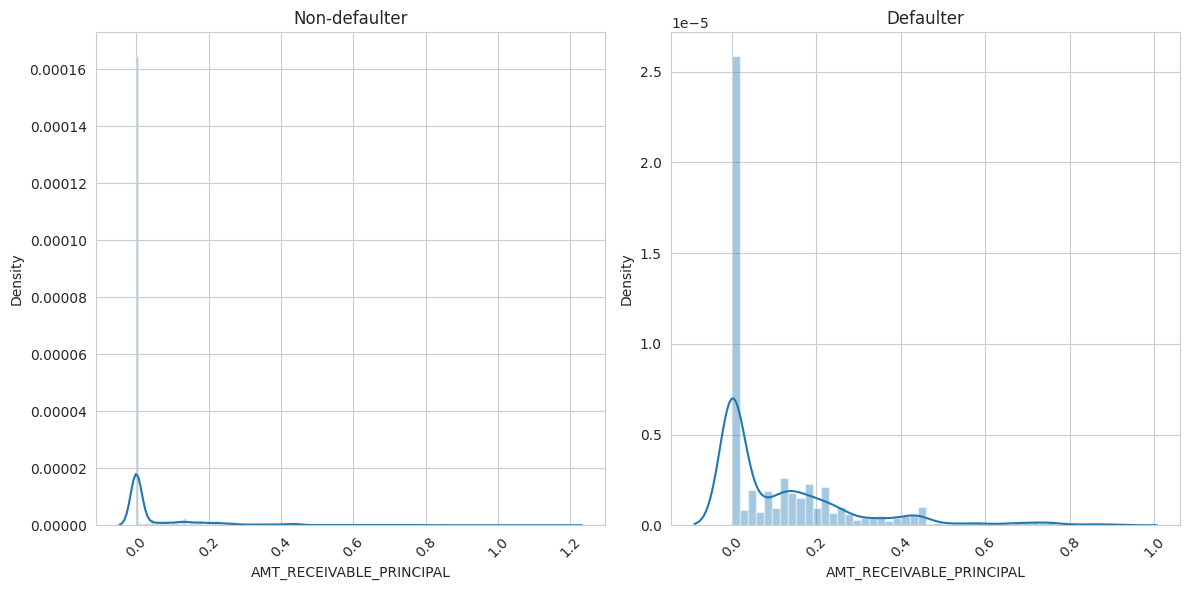

In [33]:
plot_distribution(ccb_merged, 'AMT_RECEIVABLE_PRINCIPAL', 'dist')

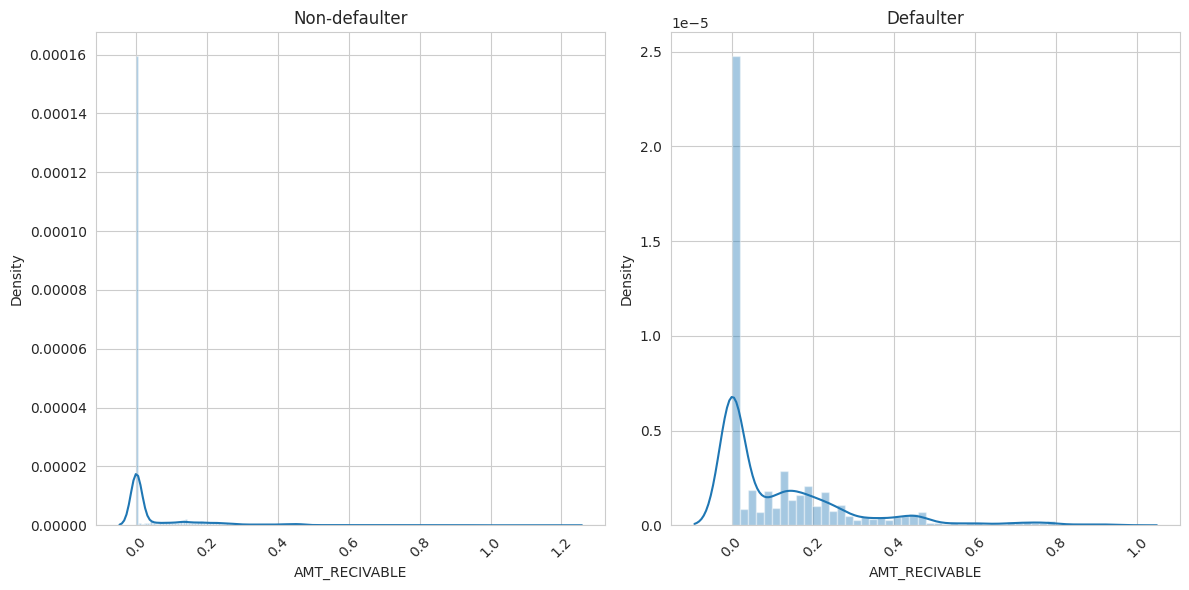

In [34]:
plot_distribution(ccb_merged, 'AMT_RECIVABLE', 'dist')

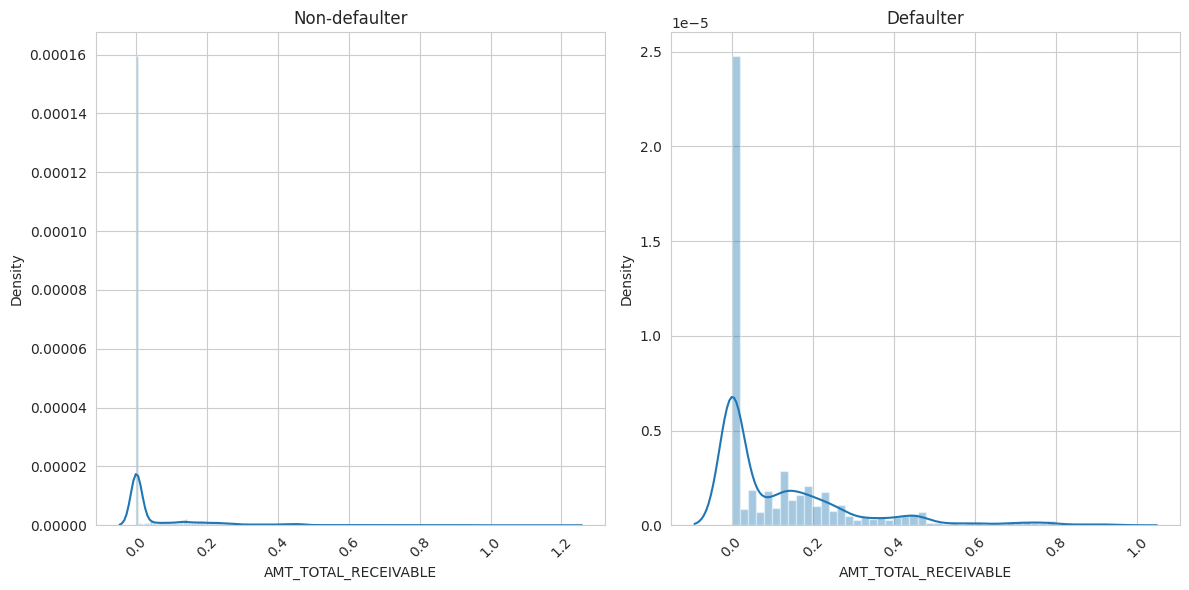

In [35]:
plot_distribution(ccb_merged, 'AMT_TOTAL_RECEIVABLE', 'dist')

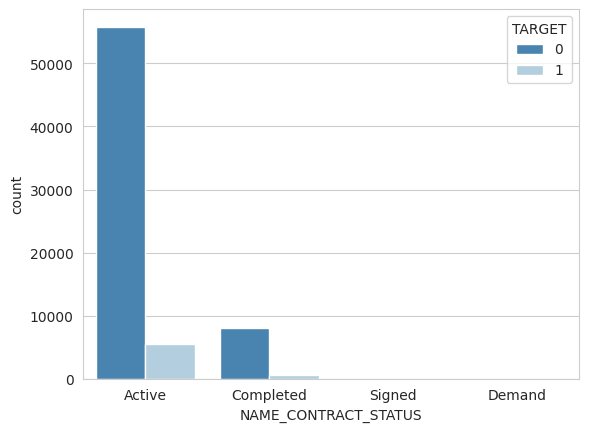

In [36]:
sns.countplot(x = ccb_merged['NAME_CONTRACT_STATUS'].dropna(), hue = ccb_merged['TARGET'], palette="Blues_r")
plt.show()

# *6. Observation and Conclusion*

Additionally, a table showcasing rows with potential outliers in several columns is presented.\
Notation: Multi columns has high correlation, might be drop or need a way to handling\
Two specific features, 'CNT_DRAWINGS_POS_CURRENT' and 'NAME_CONTRACT_STATUS,' are discussed in detail. The former exhibits a relatively high percentage of missing values (19.00%), suggesting a need for careful handling, while the latter, a categorical feature, has no missing values, simplifying the preprocessing step.